<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Project2</h3>
</div>

<img src = "https://slitayem.github.io/img/blog/2020-08-04/churn.png" width=50%>

## Importing the libraries

In [1]:
# importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Load and Prepare Data

In [2]:
# loading the dataset
df = pd.read_csv('Churn.csv', index_col=0)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# find missing data
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# selecting features and target
X_full = df.drop(['Exited', 'CustomerId', 'Surname'], axis=1)
y_full = df['Exited']

print(X_full.shape)
print(y_full.shape)

(10000, 10)
(10000,)


## EDA

In [7]:
# relation between active members and number of exits
pd.crosstab(df['IsActiveMember'], df['Exited'])

Exited,0,1
IsActiveMember,,
0,3547,1302
1,4416,735


In [8]:
# relation between having credit cards and number of exits
pd.crosstab(df['HasCrCard'], df['Exited'])

Exited,0,1
HasCrCard,,
0,2332,613
1,5631,1424


In [9]:
# relation between geography and number of exits
pd.crosstab(df['Geography'], df['Exited'])

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


In [10]:
# relation between gender and number of exits
pd.crosstab(df['Gender'], df['Exited'])

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


In [11]:
# relation between having tenure and number of exits
pd.crosstab(df['Tenure'], df['Exited'])

Exited,0,1
Tenure,,
0,318,95
1,803,232
2,847,201
3,796,213
4,786,203
5,803,209
6,771,196
7,851,177
8,828,197


## Data Preprocessing

In [12]:
# one hot encoding dataframe
OH_X_full = pd.get_dummies(X_full)
OH_X_full

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
RowNumber,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
2,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
3,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
4,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
5,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9997,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9998,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0


In [13]:
# getting scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## Strorytelling - Visualization

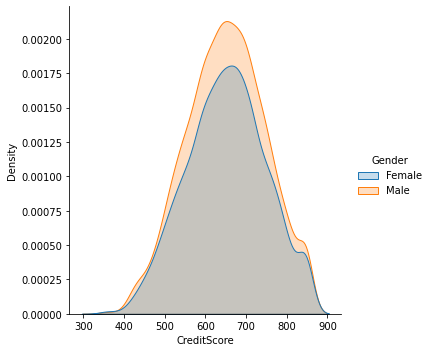

In [14]:
sns.displot(df, x='CreditScore', hue='Gender', kind='kde', fill=True)

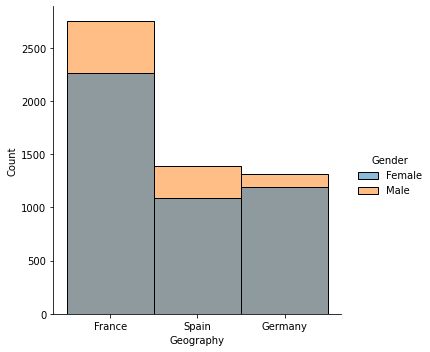

In [15]:
sns.displot(df, x='Geography', hue='Gender')

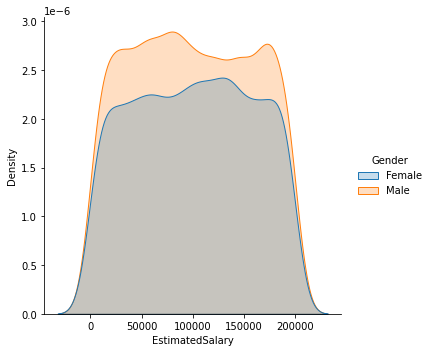

In [16]:
sns.displot(df, x='EstimatedSalary', hue='Gender', kind='kde', fill=True)

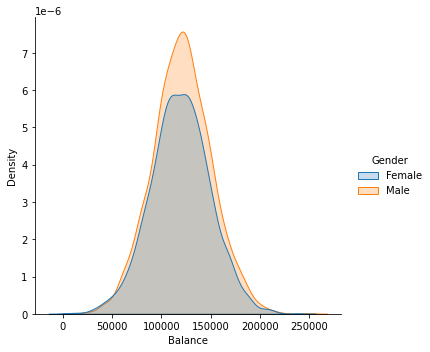

In [17]:
sns.displot(df[df.Balance > 0], x='Balance', hue='Gender', kind='kde', fill=True)

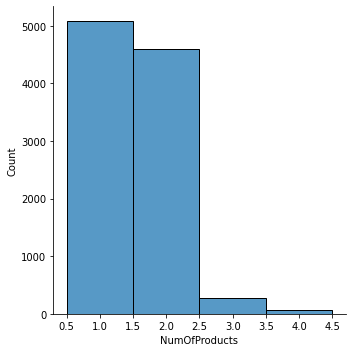

In [18]:
sns.displot(df, x='NumOfProducts', discrete=True)

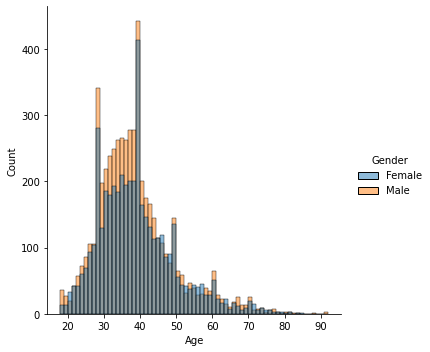

In [19]:
sns.displot(df, x='Age', hue='Gender', fill=True)

## Prepare Data for Machine learning

In [20]:
# splitting dataset to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(OH_X_full, y_full, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 13)
(2000, 13)
(8000,)
(2000,)


In [21]:
# use scaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train your model

In [22]:
# fitting model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

## Test the model and show the metrics

In [23]:
from sklearn.metrics import accuracy_score
y_pred = logreg.predict(X_test)
accuracy_score(y_test, y_pred)

0.8125

## Save your final model

In [26]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(logreg, open(filename, 'wb'))
  
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
y_pred = loaded_model.predict(X_test)
result = accuracy_score(y_test, y_pred)
print(result)

0.8125


## Send us the Result (Maktabkhoone)